In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Load Dataset and Description

In [51]:
df = pd.read_excel(r"C:\Users\user\Downloads\article_extensive_details.xlsx")
df.head()

,ArticleID,search_string,Date,Media,Title,Link,company_found_T1,T0,taxonomy_found,industry,...,Inability Investors,Downsizing,Breach of Contract,Alleged Financial Crime,Hiring Demand,Cyber Threats,Financial Accounting Irregularities,Employee Sentiment,Malicious Activities,Tax Avoidance / Tax Exposure
0,3,Freightliner Trucks AND Fraud,5/17/2021,Herald Democrat,$3M PPP loans could get Texas man 20 years in ...,https://www.heralddemocrat.com/story/news/2021...,Freightliner Trucks,Terex,"[['purchase', 1], ['court', 3], ['case', 2], [...",Retail Trade(Motor Vehicle and Parts Dealers),...,0,0,0,0,0,0,0,0,0,0
1,4,Atlanta Hartsfield AND Lawsuits,NaN,NaN,"$700,000 Settlement for Delta Employee outside...",https://www.thechampionfirm.com/case-results/7...,Atlanta Hartsfield,Oshkosh Corporation,"[['liability', 1], ['filed a lawsuit', 1], ['c...",Public Administration,...,0,0,0,0,0,0,0,0,0,0
2,5,Nikko AND Fraud,6/3/2021,MarketBeat,$137.86 Million in Sales Expected for Mimecast...,https://www.marketbeat.com/instant-alerts/nasd...,Nikko,Wirtgen Group,"[['threats', 1], ['extortion', 1], ['theft', 1...",Finance and Insurance,...,0,0,0,0,0,5,0,5,0,0
3,6,Altec AND Corruption,3/17/2017,Forbes,$3.5M Fund To Boost Civic Tech Ventures In Lat...,https://www.forbes.com/sites/annefield/2017/02...,Altec,Terex,"[['secure', 1], ['corruption', 1]]",Other Services (except Public Administration),...,0,0,0,0,0,0,0,0,0,0
4,10,Nikko AND Sexual harassment,5/17/2021,Heavy.com,'American Idol' Contestants Who Have Quit the ...,https://heavy.com/entertainment/american-idol/...,Nikko,Wirtgen Group,"[['suit', 1], ['case', 1], ['arbitration', 1]]",Finance and Insurance,...,0,0,0,0,0,0,0,0,0,0


In [52]:
date_df = df.dropna()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   ArticleID                                         924 non-null    int64 
 1   search_string                                     924 non-null    object
 2   Date                                              656 non-null    object
 3   Media                                             453 non-null    object
 4   Title                                             924 non-null    object
 5   Link                                              924 non-null    object
 6   company_found_T1                                  924 non-null    object
 7   T0                                                924 non-null    object
 8   taxonomy_found                                    924 non-null    object
 9   industry                        

In [80]:
df.describe()

,ArticleID,WGT,F_WGT,ESG_WGT,F_ESG_WGT,Credit Ratings,Fall in share price,Counterfeiting,Consumer Complaints,Lower valuation,...,Inability Investors,Downsizing,Breach of Contract,Alleged Financial Crime,Hiring Demand,Cyber Threats,Financial Accounting Irregularities,Employee Sentiment,Malicious Activities,Tax Avoidance / Tax Exposure
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.0,924.000000,924.0,924.0,924.000000,...,924.0,924.000000,924.0,924.0,924.0,924.000000,924.000000,924.000000,924.000000,924.000000
mean,2406.457792,16.239177,50.901515,15.096320,44.125541,0.0,0.103896,0.0,0.0,0.106061,...,0.0,0.280303,0.0,0.0,0.0,0.541126,0.015152,0.514069,0.007576,0.075758
std,1359.695267,19.671411,118.069558,18.982755,97.927436,0.0,0.636576,0.0,0.0,0.855551,...,0.0,1.373169,0.0,0.0,0.0,2.419548,0.325493,1.519400,0.230283,0.704956
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1198.000000,4.000000,4.000000,4.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2436.000000,8.000000,12.000000,8.000000,12.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3551.750000,21.000000,36.250000,20.000000,34.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,4593.000000,137.000000,1105.000000,170.000000,784.000000,0.0,4.000000,0.0,0.0,7.000000,...,0.0,7.000000,0.0,0.0,0.0,43.000000,7.000000,5.000000,7.000000,8.000000


In [53]:
date_df['Date'] = pd.to_datetime(date_df.Date)

C:\Users\user\AppData\Local\Temp\ipykernel_17924\3517870999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['Date'] = pd.to_datetime(date_df.Date)


### 1. Time

#### 1.1. Zero article perday how many article are there?

### 2. Company

#### 2.1. Which company maximum articles were published?

In [4]:
max_pub_comp = df.groupby('company_found_T1')['ArticleID'].count().reset_index().sort_values('ArticleID', ascending=False).rename(columns = {'company_found_T1':'Company', 'ArticleID':'Count'})
max_pub_comp.iloc[:10,:]

,Company,Count
32,Raytheon,162
30,Nikko,116
1,Altec,84
9,DEUTZ,82
15,Dana Incorporated,59
6,Cholamandalam Investment,59
36,Wacker Neuson,49
16,Dynamatic Technologies,48
39,Wirtgen America,36
18,Freightliner Trucks,34


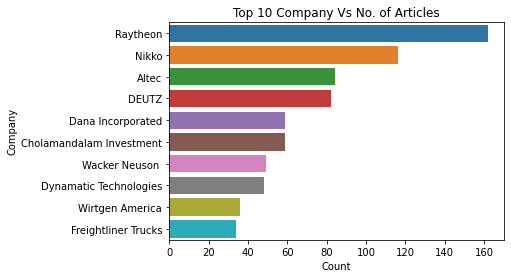

In [5]:
sns.barplot(x="Count", y="Company", data=max_pub_comp.iloc[:10,:])
plt.title("Top 10 Company Vs No. of Articles")
plt.show()

#### 2.2. Which Company maximum WGT?

In [102]:
company_weight = df.groupby('company_found_T1')['WGT'].sum().reset_index().sort_values('WGT', ascending=False).rename(columns = {'company_found_T1':'Company', 'WGT':'Weight'})
company_weight

,Company,Weight
32,Raytheon,3557
30,Nikko,1779
9,DEUTZ,1399
1,Altec,1357
39,Wirtgen America,941
36,Wacker Neuson,822
6,Cholamandalam Investment,677
15,Dana Incorporated,592
16,Dynamatic Technologies,580
18,Freightliner Trucks,570


### 3. Risk Type

### 4. Industry

#### 4.1. On which industry maximum no. of articles published?

In [105]:
max_industry_comp = df.groupby('industry')['ArticleID'].count().reset_index().sort_values('ArticleID', ascending=False).rename(columns = {'industry':'Industry', 'ArticleID':'Count'})
max_industry_comp.iloc[:10,:]

,Industry,Count
3,Manufacturing(Primary Metal),276
6,Other Services (except Public Administration),257
1,Finance and Insurance,147
7,Public Administration,68
10,Wholesale Trade,65
4,"Mining, Quarrying, and Oil and Gas Extraction",44
9,Retail Trade(Motor Vehicle and Parts Dealers),34
2,Industrials,17
8,Real Estate and Rental and Leasing,14
0,..,1


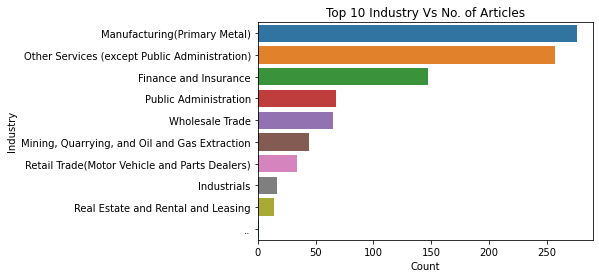

In [7]:
sns.barplot(x="Count", y="Industry", data=max_industry_comp.iloc[:10,:])
plt.title("Top 10 Industry Vs No. of Articles")
plt.show()

#### 4.2. Which industry maximum WGT?

In [101]:
industry_weight = df.groupby('industry')['WGT'].sum().reset_index().sort_values('WGT', ascending=False).rename(columns = {'industry':'Industry', 'WGT':'Weight'})
industry_weight

,Industry,Weight
3,Manufacturing(Primary Metal),4782
6,Other Services (except Public Administration),4324
1,Finance and Insurance,2201
10,Wholesale Trade,1093
7,Public Administration,888
4,"Mining, Quarrying, and Oil and Gas Extraction",584
9,Retail Trade(Motor Vehicle and Parts Dealers),570
8,Real Estate and Rental and Leasing,331
2,Industrials,226
5,Not Identified,5


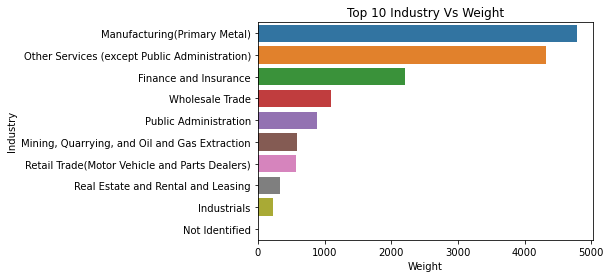

In [9]:
sns.barplot(x="Weight", y="Industry", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs Weight")
plt.show()

#### 4.3. Which industry maximum F_WGT?

In [14]:
industry_weight = df.groupby('industry')['F_WGT'].sum().reset_index().sort_values('F_WGT', ascending=False).rename(columns = {'industry':'Industry'})
industry_weight

,Industry,F_WGT
6,Other Services (except Public Administration),16335
3,Manufacturing(Primary Metal),10710
1,Finance and Insurance,7371
10,Wholesale Trade,4887
7,Public Administration,3053
4,"Mining, Quarrying, and Oil and Gas Extraction",1534
9,Retail Trade(Motor Vehicle and Parts Dealers),1391
8,Real Estate and Rental and Leasing,1195
2,Industrials,551
5,Not Identified,5


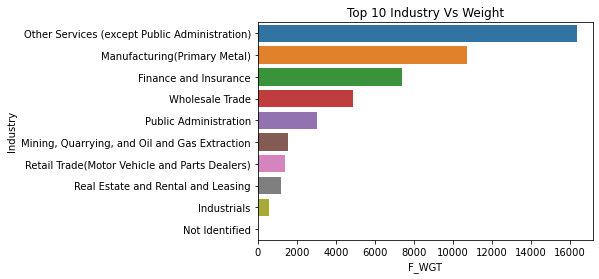

In [15]:
sns.barplot(x="F_WGT", y="Industry", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs Weight")
plt.show()

#### 4.4. Which industry maximum ESG_WGT?

In [56]:
industry_weight = df.groupby('industry')['ESG_WGT'].sum().reset_index().sort_values('ESG_WGT', ascending=False).rename(columns = {'industry':'Industry'})
industry_weight

,Industry,ESG_WGT
3,Manufacturing(Primary Metal),4682
6,Other Services (except Public Administration),3964
1,Finance and Insurance,2124
10,Wholesale Trade,904
7,Public Administration,754
9,Retail Trade(Motor Vehicle and Parts Dealers),543
4,"Mining, Quarrying, and Oil and Gas Extraction",480
8,Real Estate and Rental and Leasing,290
2,Industrials,202
5,Not Identified,6


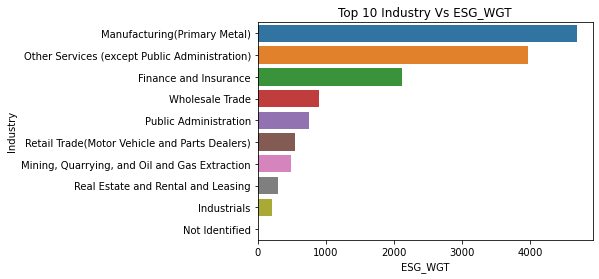

In [57]:
sns.barplot(x="ESG_WGT", y="Industry", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs ESG_WGT")
plt.show()

#### 4.5. Which industry maximum ESG_WGT?

In [58]:
industry_weight = df.groupby('industry')['F_ESG_WGT'].sum().reset_index().sort_values('F_ESG_WGT', ascending=False).rename(columns = {'industry':'Industry'})
industry_weight

,Industry,F_ESG_WGT
6,Other Services (except Public Administration),13880
3,Manufacturing(Primary Metal),10390
1,Finance and Insurance,6052
10,Wholesale Trade,4326
7,Public Administration,2348
9,Retail Trade(Motor Vehicle and Parts Dealers),1178
4,"Mining, Quarrying, and Oil and Gas Extraction",1090
8,Real Estate and Rental and Leasing,972
2,Industrials,530
5,Not Identified,6


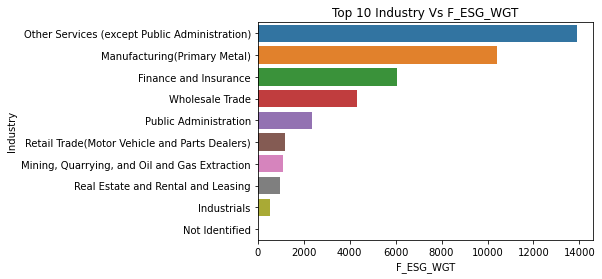

In [59]:
sns.barplot(x="F_ESG_WGT", y="Industry", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs F_ESG_WGT")
plt.show()

#### 4.6. Industry Distribution w.r.t Risk Category?

In [69]:
industry_weight = df.groupby(['industry','E1'])['ArticleID'].count().reset_index().sort_values('ArticleID', ascending=False).rename(columns = {'industry':'Industry','E1':'Risk Category', 'ArticleID':'Count'})
industry_weight

,Industry,Risk Category,Count
20,Manufacturing(Primary Metal),Legal / Liability,102
41,Other Services (except Public Administration),Legal / Liability,100
43,Other Services (except Public Administration),Product and Quality,71
5,Finance and Insurance,Legal / Liability,60
22,Manufacturing(Primary Metal),Product and Quality,37
...,...,...,...
34,"Mining, Quarrying, and Oil and Gas Extraction",Workforce,1
35,"Mining, Quarrying, and Oil and Gas Extraction",Workplace,1
36,Not Identified,Product and Quality,1
45,Other Services (except Public Administration),Stakeholder Sentiment,1


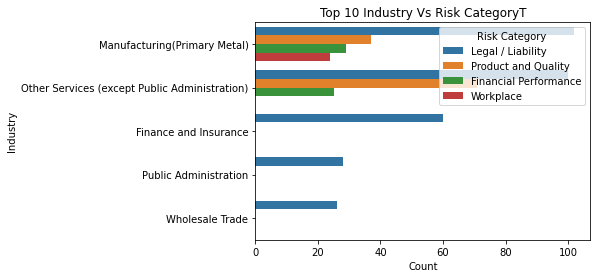

In [75]:
sns.barplot(y="Industry", x="Count", hue="Risk Category", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs Risk CategoryT")
plt.show()

#### 4.7. Industry Distribution w.r.t Risk?

In [103]:
industry_weight = df.groupby(['industry','E2'])['ArticleID'].count().reset_index().sort_values('ArticleID', ascending=False).rename(columns = {'industry':'Industry','E2':'Risk', 'ArticleID':'Count'})
industry_weight.head()

,Industry,Risk,Count
98,Other Services (except Public Administration),Legal Exposure,84
54,Manufacturing(Primary Metal),Legal Exposure,82
16,Finance and Insurance,Legal Exposure,44
94,Other Services (except Public Administration),Innovation,32
49,Manufacturing(Primary Metal),Innovation,25


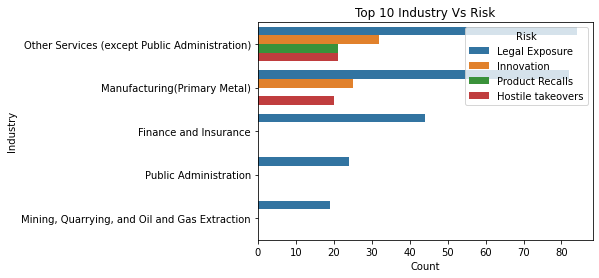

In [104]:
sns.barplot(y="Industry", x="Count", hue="Risk", data=industry_weight.iloc[:10,:])
plt.title("Top 10 Industry Vs Risk")
plt.show()

#### 4.8. Industry Weight means.

In [79]:
df.groupby('industry')['WGT','F_WGT','ESG_WGT','F_ESG_WGT'].mean().reset_index().sort_values('WGT', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17924\490419043.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('industry')['WGT','F_WGT','ESG_WGT','F_ESG_WGT'].mean().reset_index().sort_values('WGT', ascending=False)


,industry,WGT,F_WGT,ESG_WGT,F_ESG_WGT
8,Real Estate and Rental and Leasing,23.642857,85.357143,20.714286,69.428571
3,Manufacturing(Primary Metal),17.326087,38.804348,16.963768,37.644928
6,Other Services (except Public Administration),16.824903,63.560311,15.424125,54.007782
10,Wholesale Trade,16.815385,75.184615,13.907692,66.553846
9,Retail Trade(Motor Vehicle and Parts Dealers),16.764706,40.911765,15.970588,34.647059
1,Finance and Insurance,14.972789,50.142857,14.448980,41.170068
2,Industrials,13.294118,32.411765,11.882353,31.176471
4,"Mining, Quarrying, and Oil and Gas Extraction",13.272727,34.863636,10.909091,24.772727
7,Public Administration,13.058824,44.897059,11.088235,34.529412
5,Not Identified,5.000000,5.000000,6.000000,6.000000


### Industry Story

So, **Manufacturing Industry** has maximum number of articles. 276

In [106]:
max_industry_comp = df.groupby(['industry', 'company_found_T1'])['ArticleID'].count().reset_index().sort_values('ArticleID', ascending=False).rename(columns = {'industry':'Industry', 'ArticleID':'Count'})
max_industry_comp.iloc[:10,:]

,Industry,company_found_T1,Count
9,Manufacturing(Primary Metal),Raytheon,162
2,Finance and Insurance,Nikko,116
15,Other Services (except Public Administration),Altec,83
19,Other Services (except Public Administration),DEUTZ,82
6,Manufacturing(Primary Metal),Dana Incorporated,59
29,Public Administration,Cholamandalam Investment,59
25,Other Services (except Public Administration),Wacker Neuson,49
7,Manufacturing(Primary Metal),Dynamatic Technologies,48
40,Wholesale Trade,Wirtgen America,36
37,Retail Trade(Motor Vehicle and Parts Dealers),Freightliner Trucks,34


In [120]:
max_industry_comp.iloc[-10:-1,:]

,Industry,company_found_T1,Count
21,Other Services (except Public Administration),"DEUTZ, Dynamatic Technologies",1
27,Other Services (except Public Administration),"Wirtgen (China) Machinery, Benninghoven",1
24,Other Services (except Public Administration),"DEUTZ, Wirtgen America",1
22,Other Services (except Public Administration),"DEUTZ, Freightliner Trucks, Benninghoven , Wac...",1
17,Other Services (except Public Administration),"Altec, DEUTZ, Wacker Neuson",1
16,Other Services (except Public Administration),"Altec, Custom Truck",1
14,Not Identified,JOSEPH VÃ–GELE AG,1
8,Manufacturing(Primary Metal),"Dynamatic Technologies, Raytheon",1
3,Finance and Insurance,"Nikko, Benninghoven",1


In manufacturing industry, **Raytheon** has highest number of articles. 162

In [109]:
industry_company = df.groupby(['industry', 'company_found_T1'])['WGT','F_WGT','ESG_WGT','F_ESG_WGT'].mean().reset_index().sort_values('WGT', ascending=False).rename(columns = {'industry':'Industry', 'company_found_T1':'Company'})
industry_company[industry_company['Company']=='Raytheon']

C:\Users\user\AppData\Local\Temp\ipykernel_17924\4216874959.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  industry_company = df.groupby(['industry', 'company_found_T1'])['WGT','F_WGT','ESG_WGT','F_ESG_WGT'].mean().reset_index().sort_values('WGT', ascending=False).rename(columns = {'industry':'Industry', 'company_found_T1':'Company'})


,Industry,Company,WGT,F_WGT,ESG_WGT,F_ESG_WGT
9,Manufacturing(Primary Metal),Raytheon,21.95679,50.17284,22.148148,50.135802


In [118]:
date_df.groupby(['company_found_T1','Date'])['ArticleID'].count()

company_found_T1  Date      
Altec             2015-12-17    1
                  2016-01-17    1
                  2016-06-17    1
                  2016-10-17    1
                  2017-01-17    1
                               ..
Wirtgen America   2016-12-17    1
                  2017-09-17    1
                  2017-12-17    1
                  2018-10-17    1
                  2019-11-17    1
Name: ArticleID, Length: 258, dtype: int64

### WordCloud

In [135]:
from wordcloud import WordCloud, STOPWORDS

# iterate through the csv file

def company_cloud(C):
    comment_words = ''
    stopwords = set(STOPWORDS)

    for val in C.Title:
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 1600, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (16, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

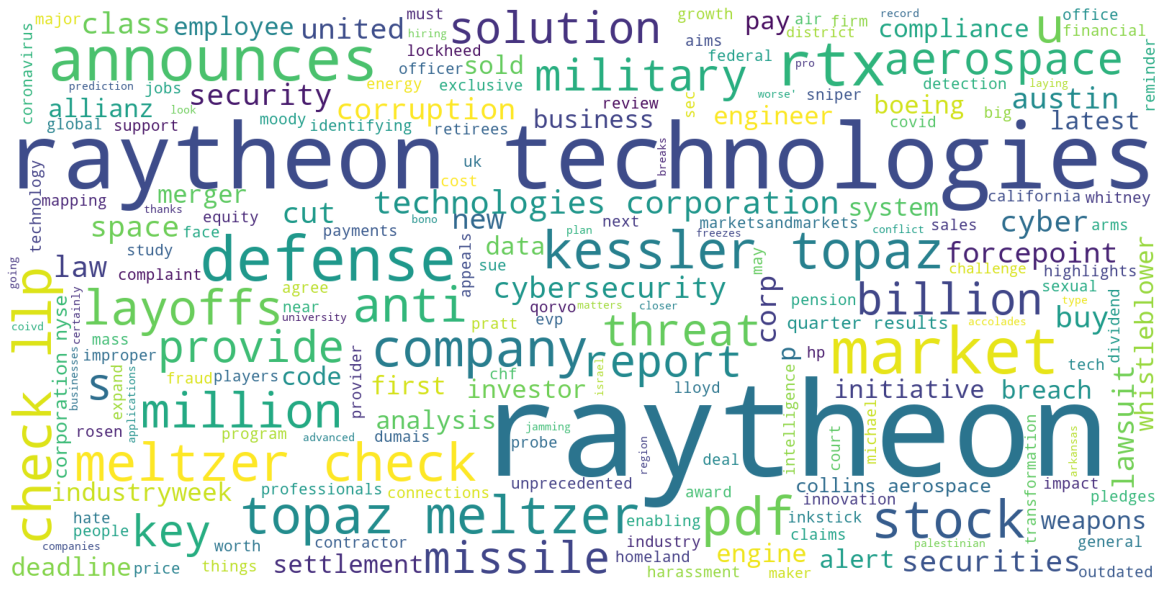

In [138]:
A = df[df['company_found_T1']=='Raytheon']
company_cloud(A)

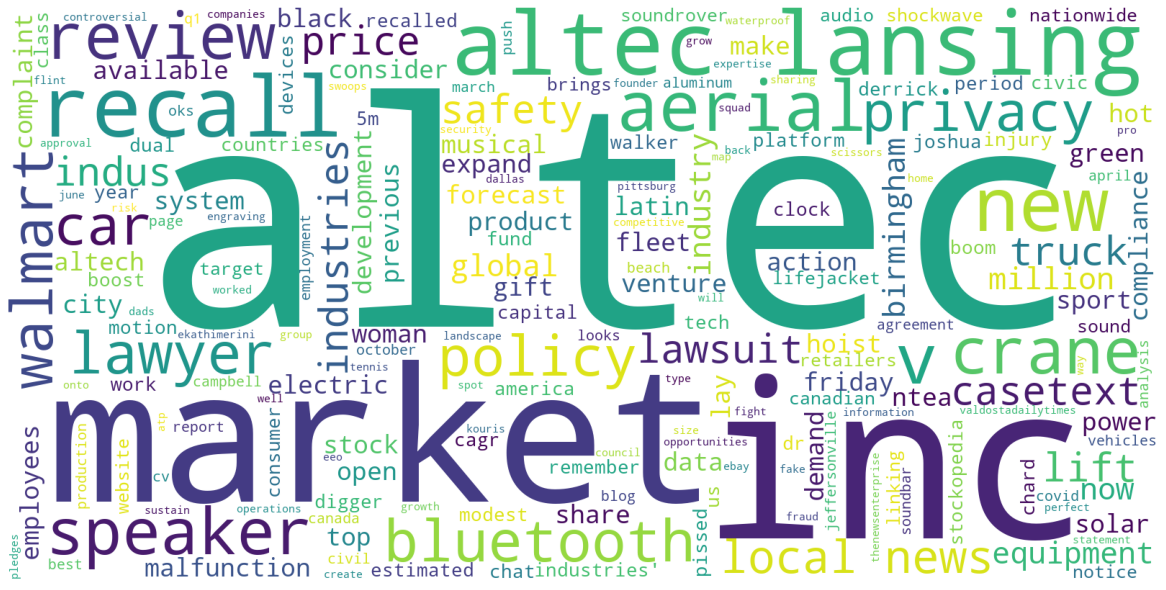

In [137]:
A = df[df['company_found_T1']=='Altec']
company_cloud(A)

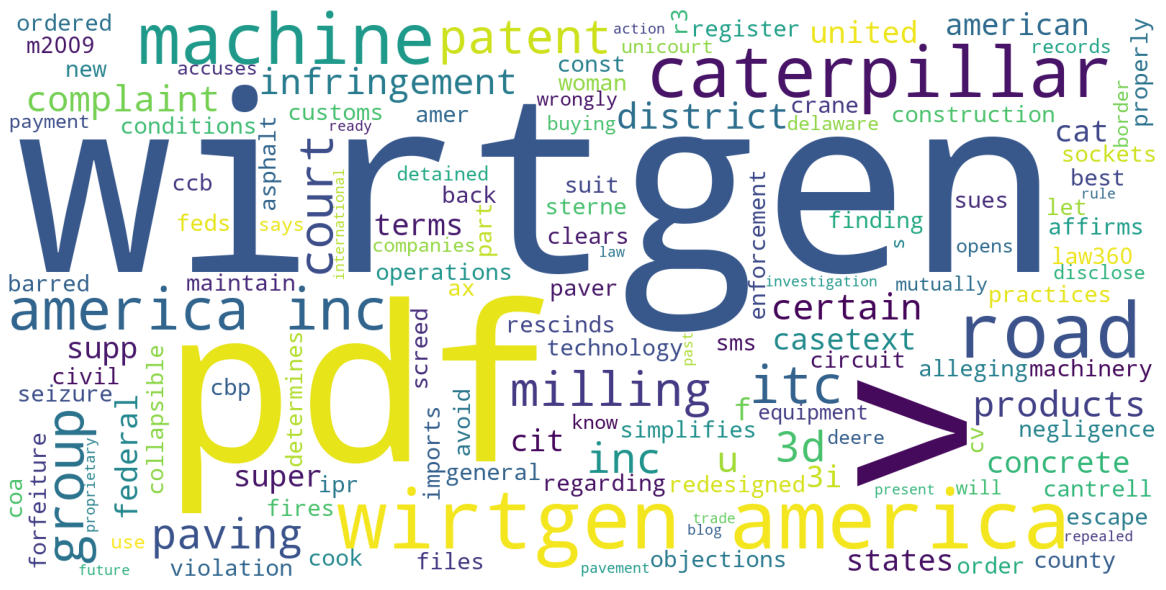

In [139]:
A = df[df['company_found_T1']=='Wirtgen America']
company_cloud(A)